# Titanic Analysis and Exploration
### Dodge McIntosh LA

### Project 1: Titanic EDA
This week was all about Pandas and plotting. At this point you should be chomping at the bit to get your hands dirty on a real-world dataset.

For this project, we're going to take a look at the Titanic manifest. We'll be exploring this data to see what we can learn regarding the survival rates of different groups of people.

Prework
Fork and clone this repo. At the end of this project, you'll submit a pull request using the Titanic.ipynb notebook to answer the questions below.

In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns

In [2]:
sns.set_style("darkgrid")

## Step 1: Reading the data
Go to https://www.kaggle.com/c/titanic/data
If you scroll down the page a bit, you'll see a data dictionary explaining each of the columns. Take a minute to familiarize yourself with how the csv is structured.
Download the train.csv file into this project
Create an iPython notebook and load the csv into pandas.

In [3]:
titanic = pd.read_csv('train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic.shape

(891, 12)

## Step 2: Cleaning the data

##### Create a bar chart showing how many missing values are in each column.

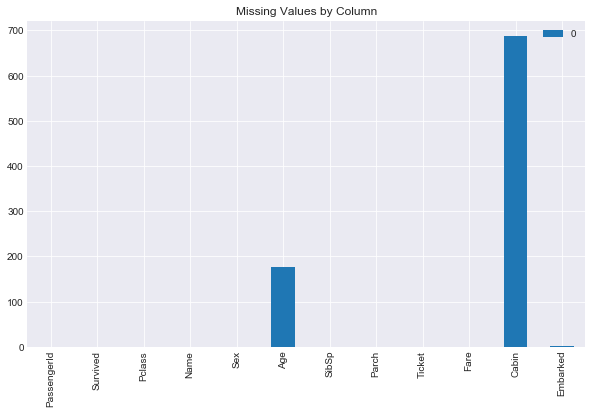

In [128]:
missing_values = pd.DataFrame(titanic.isnull().sum())

missing_values.plot(kind='bar', title='Missing Values by Column', figsize=(10,6));

#### Which column has the most NaN values? How many cells in that column are empty?

#### *The 'Cabin' column has the most missing values at 687 missing cells.*

In [129]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Delete all rows where Embarked is empty

In [130]:
titanic.dropna(subset=['Embarked'], how='any', inplace=True)

In [131]:
titanic.shape

(889, 12)

#### Fill all empty cabins with ¯\(ツ)/¯

In [132]:
titanic['Cabin'].fillna(value='¯\(ツ)/¯', inplace=True)

In [133]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,S


## Step 3: Feature extraction

#### There are two columns that pertain to how many family members are on the boat for a given person. Create a new column called FamilyCount which will be the sum of those two columns.

In [134]:
titanic['FamilyCount'] = titanic['Parch'] + titanic['SibSp']
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S,0


#### Reverends have a special title in their name. Create a column called IsReverend: 1 if they're a preacher, 0 if they're not.

In [135]:
revs = []

for row in titanic['Name']:
    if 'Rev.' in row:
        revs.append(1)
    else:
        revs.append(0)
        
titanic['IsReverend'] = revs
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,S,0,0


In [136]:
# Checking that the new column assigned values correctly.
titanic.loc[titanic['Name'].str.contains('Rev'), :]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend
149,150,0,2,"Byles, Rev. Thomas Roussel Davids",male,42.0,0,0,244310,13.000,¯\(ツ)/¯,S,0,1
150,151,0,2,"Bateman, Rev. Robert James",male,51.0,0,0,S.O.P. 1166,12.525,¯\(ツ)/¯,S,0,1
249,250,0,2,"Carter, Rev. Ernest Courtenay",male,54.0,1,0,244252,26.000,¯\(ツ)/¯,S,1,1
626,627,0,2,"Kirkland, Rev. Charles Leonard",male,57.0,0,0,219533,12.350,¯\(ツ)/¯,Q,0,1
848,849,0,2,"Harper, Rev. John",male,28.0,0,1,248727,33.000,¯\(ツ)/¯,S,1,1
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.000,¯\(ツ)/¯,S,0,1


#### In order to feed our training data into a classification algorithm, we need to convert our categories into 1's and 0's using pd.get_dummies.

#### Create 3 columns: Embarked_C, Embarked_Q and Embarked_S. These columns will have 1's and 0's that correspond to the C, Q and S values in the Embarked column.

In [137]:
embarked_dummies = pd.get_dummies(titanic['Embarked'], prefix='Embarked')

In [138]:
titanic = pd.concat([titanic, embarked_dummies], axis=1)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S,1,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,S,0,0,0,0,1


#### Do the same thing for Sex.

In [139]:
sex_dummies = pd.get_dummies(titanic['Sex'], prefix='Sex')

In [140]:
titanic = pd.concat([titanic, sex_dummies], axis=1)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S,1,0,0,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,1,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S,0,0,0,0,1,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,0,0,1,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,S,0,0,0,0,1,0,1


## Step 4: Exploratory analysis

#### What was the survival rate overall?   

#### ~38.2%

In [141]:
titanic['Survived'].mean()

0.38245219347581555

#### Which gender fared the worst? What was their survival rate?

#### Men fared the worst at a survival rate just below 19%.

In [142]:
titanic.groupby('Sex')['Survived'].mean()

Sex
female    0.740385
male      0.188908
Name: Survived, dtype: float64

#### What was the survival rate for each Pclass?

#### 1st Class ~ 63%, 2nd Class ~ 47%, 3rd Class ~ 24%

In [143]:
titanic.groupby('Pclass')['Survived'].mean()

Pclass
1    0.626168
2    0.472826
3    0.242363
Name: Survived, dtype: float64

#### Did any reverends survive? How many?

#### Not looking good if you were a reverend...

In [144]:
titanic.groupby('IsReverend')['Survived'].mean()

IsReverend
0    0.385051
1    0.000000
Name: Survived, dtype: float64

#### What is the survival rate for cabins marked ¯\(ツ)/¯

#### About 29.9% chance of surviving if we don't know your cabin.

In [145]:
titanic.groupby((titanic['Cabin'] == '¯\(ツ)/¯'))['Survived'].mean()

Cabin
False    0.663366
True     0.299854
Name: Survived, dtype: float64

#### What is the survival rate for people whose Age is empty?

#### About 29.4%

In [146]:
titanic_age = titanic.dropna(subset = ['Age'])
no_age_survival_rate = (titanic['Survived'].sum() - titanic_age['Survived'].sum()) / (titanic.shape[0] - titanic_age.shape[0]) * 100
print(no_age_survival_rate)

29.37853107344633


#### What is the survival rate for each port of embarkation?

#### Port C ~ 55%, Port Q ~ 39%, Port S ~ 34%

In [147]:
titanic.groupby('Embarked')['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

#### What is the survival rate for children (under 12) in each Pclass?

In [148]:
titanic.groupby((titanic['Age'] < 12) & (titanic['Pclass'] == 1))['Survived'].mean()

False    0.380791
True     0.750000
Name: Survived, dtype: float64

In [149]:
titanic.groupby((titanic['Age'] < 12) & (titanic['Pclass'] == 2))['Survived'].mean()

False    0.370413
True     1.000000
Name: Survived, dtype: float64

In [150]:
titanic.groupby((titanic['Age'] < 12) & (titanic['Pclass'] == 3))['Survived'].mean()

False    0.381235
True     0.404255
Name: Survived, dtype: float64

#### Did the captain of the ship survive? Is he on the list?

#### A captain always goes down with his ship!

In [151]:
titanic.loc[titanic['Name'].str.contains('Capt'), :]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0,B22,S,2,0,0,0,1,0,1


#### Of all the people that died, who had the most expensive ticket? How much did it cost?

#### Poor Messrs Charles and Mark Fortune paid a whopping $263 for their tickets and still didn't make it out alive.

In [152]:
dead_and_fare = titanic.loc[(titanic['Survived']==0), :]

dead_and_fare.loc[dead_and_fare['Fare']==263, :]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0,C23 C25 C27,S,5,0,0,0,1,0,1
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0,C23 C25 C27,S,5,0,0,0,1,0,1


In [172]:
dead_and_fare_simple = titanic.loc[(titanic['Survived']==0), ['Name', 'Fare']]

#### Does having family on the boat help or hurt your chances of survival?

#### It seems like it helps but only up to a certain point. Traveling with 3 family members really gave you the best shot at survival, while if you were trying to wrangle all 10 of your family members up, it didn't turn out so well :(

In [154]:
titanic.groupby('FamilyCount')['Survived'].mean()

FamilyCount
0     0.300935
1     0.552795
2     0.578431
3     0.724138
4     0.200000
5     0.136364
6     0.333333
7     0.000000
10    0.000000
Name: Survived, dtype: float64

## Step 5: Plotting

#### Using Matplotlib and Seaborn, create several charts showing the survival rates of different groups of people. It's fine if a handful of charts are basic (Gender, Age, etc), but what we're really looking for is something beneath the surface.

#### Well at least luck didn't factor in too much...

In [173]:
#Checking for unlucky room #13

titanic.loc[(titanic['Cabin'].str.contains('13')), ['Name', 'Survived', 'Cabin']]

,Name,Survived,Cabin


#### Let's check for some correlations, nothing too convincing.

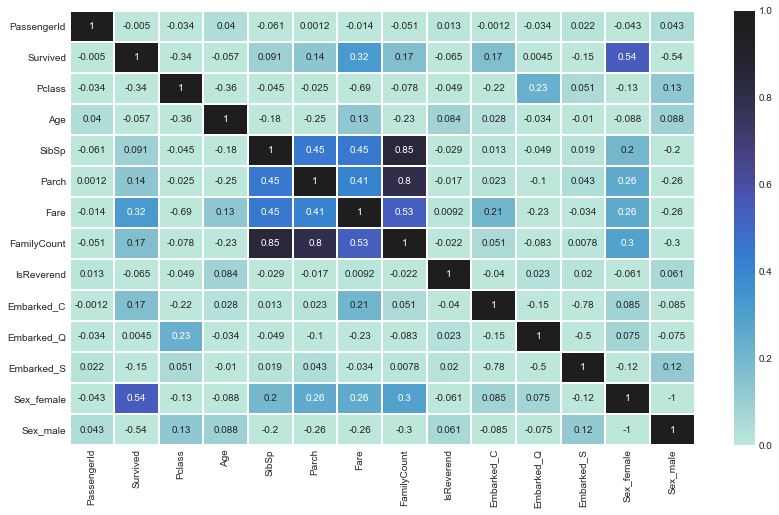

In [174]:
#Seeing if anything is correlated. Looks like having more siblings is shockingly strongly correlated with having a bigger family count.

plt.figure(figsize=(14,8))
sns.heatmap(titanic.corr(method='spearman'), annot=True, linewidths=1, center=1, vmin=0, vmax=1);

### Wait... the most important question of all...

# WOULD I HAVE SURVIVED THE TITANIC?!

In [157]:
titanic.groupby('Sex')['Survived'].mean()

Sex
female    0.740385
male      0.188908
Name: Survived, dtype: float64

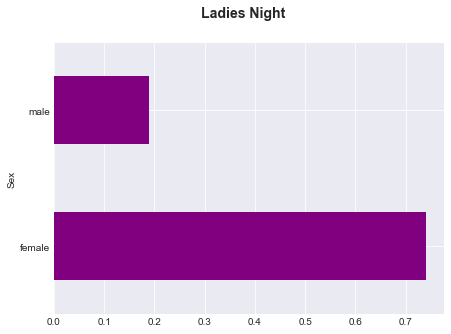

In [175]:
#Checking by gender first.

fig = plt.figure()
fig.suptitle('Ladies Night', fontsize=14, fontweight='bold')

titanic.groupby('Sex')['Survived'].mean().plot(figsize=(7,5), kind='barh', grid=True, color='Purple');

##### 13 dollars in 1912 is about 320 dollars today and...
##### 26 dollars in 1912 is about 640 dollars today, so I think I'd be squarely in the middle class.

In [159]:
second_class_and_male = (titanic['Sex'] == 'male') & (titanic['Pclass'] == 2)

titanic.groupby(second_class_and_male)['Survived'].mean()

False    0.413572
True     0.157407
Name: Survived, dtype: float64

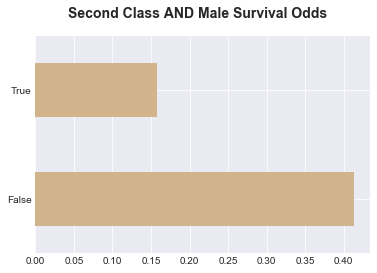

In [176]:
#Checking by gender and class.

fig = plt.figure()
fig.suptitle('Second Class AND Male Survival Odds', fontsize=14, fontweight='bold')

titanic.groupby(second_class_and_male)['Survived'].mean().plot(kind='barh', grid=True, color='Tan');

In [161]:
second_class_male_25 = (titanic['Sex'] == 'male') & (titanic['Pclass'] == 2) & (titanic['Age'] == 25)

titanic.groupby(second_class_male_25)['Survived'].mean()

False    0.384615
True     0.000000
Name: Survived, dtype: float64

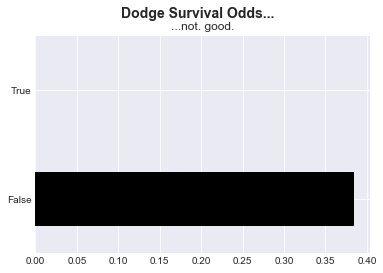

In [177]:
#Checking by gender, class, and age.

fig = plt.figure()
fig.suptitle('Dodge Survival Odds...', fontsize=14, fontweight='bold')
titanic.groupby(second_class_male_25)['Survived'].mean().plot(kind='barh', title='...not. good.', color='Black');

In [178]:
#Just for fun!

titanic.loc[titanic['Name'].str.contains('Dodge'), :]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
445,446,1,1,"Dodge, Master. Washington",male,4.0,0,2,33638,81.8583,A34,S,2,0,0,0,1,0,1


## Investigating some other stuff!

In [164]:
titanic.loc[titanic['Name'].str.contains('Fortune'), :]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0,C23 C25 C27,S,5,0,0,0,1,0,1
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0,C23 C25 C27,S,5,0,0,0,1,1,0
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0,C23 C25 C27,S,5,0,0,0,1,1,0
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0,C23 C25 C27,S,5,0,0,0,1,0,1


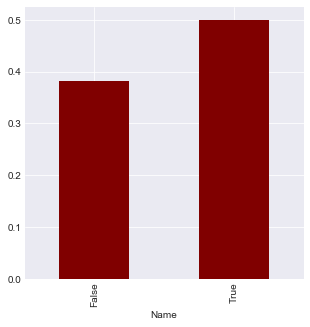

In [165]:
plt.figure(figsize=(5, 5))
titanic.groupby(titanic['Name'].str.contains('Fortune'))['Survived'].mean().plot(kind='bar', color='Maroon');

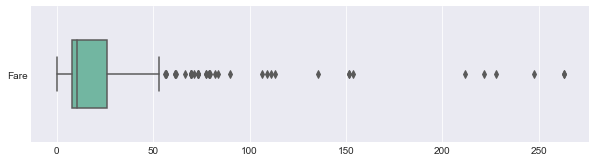

In [171]:
plt.figure(figsize=(10, 2.5))

sns.boxplot(data=dead_and_fare_simple, orient="h", palette="Set2", width=.5);

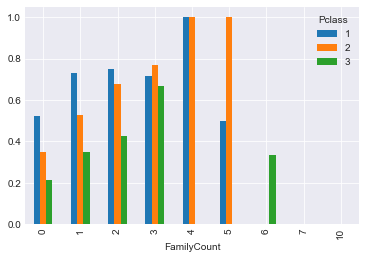

In [167]:
titanic.groupby(['FamilyCount', 'Pclass'])['Survived'].mean().unstack().plot(kind='bar');

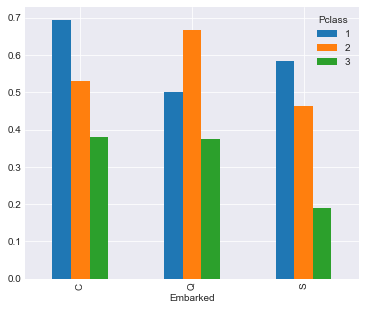

In [168]:
titanic.groupby(['Embarked', 'Pclass'])['Survived'].mean().unstack().plot(kind='bar', figsize=(6,5));

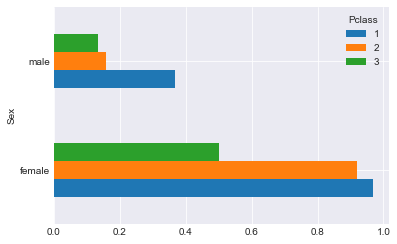

In [169]:
titanic.groupby(['Sex', 'Pclass'])['Survived'].mean().unstack().plot(kind='barh');

In [170]:
titanic.to_csv('titanic_updated.csv', index=False)